 # Import datasets

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
imdb_title_ratings = pd.read_csv('data/imdb.title.ratings.csv')
imdb_title_basics = pd.read_csv('data/imdb.title.basics.csv')
tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')

## first glance at dataset and pre-cleaning of individual dataset

### imdb_title_ratings

In [ ]:
imdb_title_ratings.head()

In [ ]:
imdb_title_ratings.info()

In [ ]:
imdb_title_ratings.isna().sum()

In [ ]:
len(imdb_title_ratings.tconst) != len(set(imdb_title_ratings.tconst))

#### imdb_title_ratings looks fine. no duplicate, no missing values

### imdb_title_basics

In [3]:
imdb_title_basics.head()

NameError: name 'imdb_title_basics' is not defined

In [4]:
imdb_title_basics.info()

NameError: name 'imdb_title_basics' is not defined

In [9]:
len(imdb_title_basics.tconst) != len(set(imdb_title_basics.tconst))

False

In [10]:
len(imdb_title_basics['primary_title']) != len(set(imdb_title_basics['primary_title']))

True

There are duplicates in the primary_title column.

In [11]:
# result = imdb_title_basics[imdb_title_basics['primary_title'].\
#                           isin(imdb_title_basics[imdb_title_basics.duplicated(['primary_title'])]['primary_title'])]
# result.sort_values('primary_title')

In [12]:
imdb_title_basics = imdb_title_basics.drop_duplicates(['primary_title'])

In [13]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136071 entries, 0 to 146143
Data columns (total 6 columns):
tconst             136071 non-null object
primary_title      136071 non-null object
original_title     136055 non-null object
start_year         136071 non-null int64
runtime_minutes    106598 non-null float64
genres             131180 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 7.3+ MB


In [14]:
imdb_title_basics.isna().sum()

tconst                 0
primary_title          0
original_title        16
start_year             0
runtime_minutes    29473
genres              4891
dtype: int64

Leave the missing values for later. 

### tn_movie_budgets

In [15]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [16]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.1+ KB


In [17]:
len(tn_movie_budgets['movie']) != len(set(tn_movie_budgets['movie']))

True

In [18]:
tn_movie_budgets = tn_movie_budgets.drop_duplicates(['movie'])

In [19]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5781
Data columns (total 6 columns):
id                   5698 non-null int64
release_date         5698 non-null object
movie                5698 non-null object
production_budget    5698 non-null object
domestic_gross       5698 non-null object
worldwide_gross      5698 non-null object
dtypes: int64(1), object(5)
memory usage: 311.6+ KB


#### tn_movie_budgets looks fine, no duplicate, no missing values. 

# Merge datasets

In [20]:
imdb_joined = pd.merge(imdb_title_basics, imdb_title_ratings, on='tconst', how='inner')

In [21]:
imdb_joined.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [22]:
imdb_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68827 entries, 0 to 68826
Data columns (total 8 columns):
tconst             68827 non-null object
primary_title      68827 non-null object
original_title     68827 non-null object
start_year         68827 non-null int64
runtime_minutes    61670 non-null float64
genres             68065 non-null object
averagerating      68827 non-null float64
numvotes           68827 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 4.7+ MB


In [23]:
imdb_joined['movie'] = imdb_joined['primary_title']

In [24]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [25]:
df = pd.merge(imdb_joined, tn_movie_budgets, on='movie', how='inner')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2033 entries, 0 to 2032
Data columns (total 14 columns):
tconst               2033 non-null object
primary_title        2033 non-null object
original_title       2033 non-null object
start_year           2033 non-null int64
runtime_minutes      1988 non-null float64
genres               2031 non-null object
averagerating        2033 non-null float64
numvotes             2033 non-null int64
movie                2033 non-null object
id                   2033 non-null int64
release_date         2033 non-null object
production_budget    2033 non-null object
domestic_gross       2033 non-null object
worldwide_gross      2033 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 238.2+ KB


In [27]:
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,Foodfight!,26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,7.5,24,The Overnight,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,37,"Dec 25, 2013","$91,000,000","$58,236,838","$187,861,183"
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,67,"Sep 19, 2014","$28,000,000","$26,017,685","$62,108,587"


# Data cleaning

In [28]:
# change the type of 'release_date' to timedelta
df['release_date'] = pd.to_datetime(df['release_date'])

In [29]:
# get 'release_year'
df['release_year'] = df['release_date'].dt.to_period("Y")

In [30]:
# get 'release_month'
df['release_month_year'] = df['release_date'].dt.to_period("M")

In [31]:
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie,id,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month_year
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,Foodfight!,26,2012-12-31,"$45,000,000",$0,"$73,706",2012,2012-12
1,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,7.5,24,The Overnight,21,2015-06-19,"$200,000","$1,109,808","$1,165,996",2015,2015-06
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,17,2013-03-22,"$25,000,000","$720,828","$9,313,302",2013,2013-03
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,37,2013-12-25,"$91,000,000","$58,236,838","$187,861,183",2013,2013-12
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,67,2014-09-19,"$28,000,000","$26,017,685","$62,108,587",2014,2014-09


In [32]:
df['duration'] = df['runtime_minutes']
df['budget'] = df['production_budget']

In [33]:
df.drop(['tconst', 'primary_title', 'original_title', 'start_year', 'id', 'runtime_minutes', 'production_budget'], axis = 1, inplace = True)

In [34]:
# rearrange columns
df = df[['movie', 'genres', 'duration',\
         'averagerating', 'numvotes', 'release_date',\
         'release_year', 'release_month_year', 'budget',\
         'domestic_gross', 'worldwide_gross']]

In [35]:
df.head()

,movie,genres,duration,averagerating,numvotes,release_date,release_year,release_month_year,budget,domestic_gross,worldwide_gross
0,Foodfight!,"Action,Animation,Comedy",91.0,1.9,8248,2012-12-31,2012,2012-12,"$45,000,000",$0,"$73,706"
1,The Overnight,NaN,88.0,7.5,24,2015-06-19,2015,2015-06,"$200,000","$1,109,808","$1,165,996"
2,On the Road,"Adventure,Drama,Romance",124.0,6.1,37886,2013-03-22,2013,2013-03,"$25,000,000","$720,828","$9,313,302"
3,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",114.0,7.3,275300,2013-12-25,2013,2013-12,"$91,000,000","$58,236,838","$187,861,183"
4,A Walk Among the Tombstones,"Action,Crime,Drama",114.0,6.5,105116,2014-09-19,2014,2014-09,"$28,000,000","$26,017,685","$62,108,587"


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2033 entries, 0 to 2032
Data columns (total 11 columns):
movie                 2033 non-null object
genres                2031 non-null object
duration              1988 non-null float64
averagerating         2033 non-null float64
numvotes              2033 non-null int64
release_date          2033 non-null datetime64[ns]
release_year          2033 non-null period[A-DEC]
release_month_year    2033 non-null period[M]
budget                2033 non-null object
domestic_gross        2033 non-null object
worldwide_gross       2033 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(5), period[A-DEC](1), period[M](1)
memory usage: 190.6+ KB


In [38]:
# Convert object(production_budget, domestic_gross, and worldwide_gross) to float
df['budget'] = df['budget'].map(lambda x:float(x.replace("$", "").replace(",", "")))
df['domestic_gross'] = df['domestic_gross'].map(lambda x:float(x.replace("$", "").replace(",", "")))
df['worldwide_gross'] = df['worldwide_gross'].map(lambda x:float(x.replace("$", "").replace(",", "")))

In [39]:
df.head()

,movie,genres,duration,averagerating,numvotes,release_date,release_year,release_month_year,budget,domestic_gross,worldwide_gross
0,Foodfight!,"Action,Animation,Comedy",91.0,1.9,8248,2012-12-31,2012,2012-12,45000000.0,0.0,73706.0
1,The Overnight,NaN,88.0,7.5,24,2015-06-19,2015,2015-06,200000.0,1109808.0,1165996.0
2,On the Road,"Adventure,Drama,Romance",124.0,6.1,37886,2013-03-22,2013,2013-03,25000000.0,720828.0,9313302.0
3,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",114.0,7.3,275300,2013-12-25,2013,2013-12,91000000.0,58236838.0,187861183.0
4,A Walk Among the Tombstones,"Action,Crime,Drama",114.0,6.5,105116,2014-09-19,2014,2014-09,28000000.0,26017685.0,62108587.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2033 entries, 0 to 2032
Data columns (total 11 columns):
movie                 2033 non-null object
genres                2031 non-null object
duration              1988 non-null float64
averagerating         2033 non-null float64
numvotes              2033 non-null int64
release_date          2033 non-null datetime64[ns]
release_year          2033 non-null period[A-DEC]
release_month_year    2033 non-null period[M]
budget                2033 non-null float64
domestic_gross        2033 non-null float64
worldwide_gross       2033 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(2), period[A-DEC](1), period[M](1)
memory usage: 190.6+ KB


# Stop here!!!

In [22]:
# starting from here, I created two dataframes--df1 and df2.
# we can choose either df1 or df2 to work on. 
# the main difference between df1 and df2 is whether do I keep 'runtime_minutes'

In [23]:
# df1: drop 'runtime_minutes' and get rid of missing values in 'genres'
# return 2867 items

In [24]:
df1 = df.drop('runtime_minutes', axis = 1)

In [25]:
df1.head()

,genres,averagerating,numvotes,title,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month_year
0,"Action,Animation,Comedy",1.9,8248,Foodfight!,2012-12-31,45000000.0,0.0,73706.0,2012,2012-12
1,NaN,7.5,24,The Overnight,2015-06-19,200000.0,1109808.0,1165996.0,2015,2015-06
2,"Comedy,Mystery",6.1,14828,The Overnight,2015-06-19,200000.0,1109808.0,1165996.0,2015,2015-06
3,"Adventure,Drama,Romance",6.1,37886,On the Road,2013-03-22,25000000.0,720828.0,9313302.0,2013,2013-03
4,Drama,6.0,6,On the Road,2013-03-22,25000000.0,720828.0,9313302.0,2013,2013-03


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 10 columns):
genres                2867 non-null object
averagerating         2875 non-null float64
numvotes              2875 non-null int64
title                 2875 non-null object
release_date          2875 non-null datetime64[ns]
production_budget     2875 non-null float64
domestic_gross        2875 non-null float64
worldwide_gross       2875 non-null float64
release_year          2875 non-null period[A-DEC]
release_month_year    2875 non-null period[M]
dtypes: datetime64[ns](1), float64(4), int64(1), object(2), period[A-DEC](1), period[M](1)
memory usage: 247.1+ KB


In [27]:
df1 = df1[~df1['genres'].isna()]

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 0 to 2874
Data columns (total 10 columns):
genres                2867 non-null object
averagerating         2867 non-null float64
numvotes              2867 non-null int64
title                 2867 non-null object
release_date          2867 non-null datetime64[ns]
production_budget     2867 non-null float64
domestic_gross        2867 non-null float64
worldwide_gross       2867 non-null float64
release_year          2867 non-null period[A-DEC]
release_month_year    2867 non-null period[M]
dtypes: datetime64[ns](1), float64(4), int64(1), object(2), period[A-DEC](1), period[M](1)
memory usage: 246.4+ KB


In [29]:
# df1-1. Data correlation

In [30]:
df1.corr()

,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross
averagerating,1.000000,0.312122,0.129830,0.177276,0.165638
numvotes,0.312122,1.000000,0.502965,0.563362,0.560655
production_budget,0.129830,0.502965,1.000000,0.716270,0.778746
domestic_gross,0.177276,0.563362,0.716270,1.000000,0.946493
worldwide_gross,0.165638,0.560655,0.778746,0.946493,1.000000


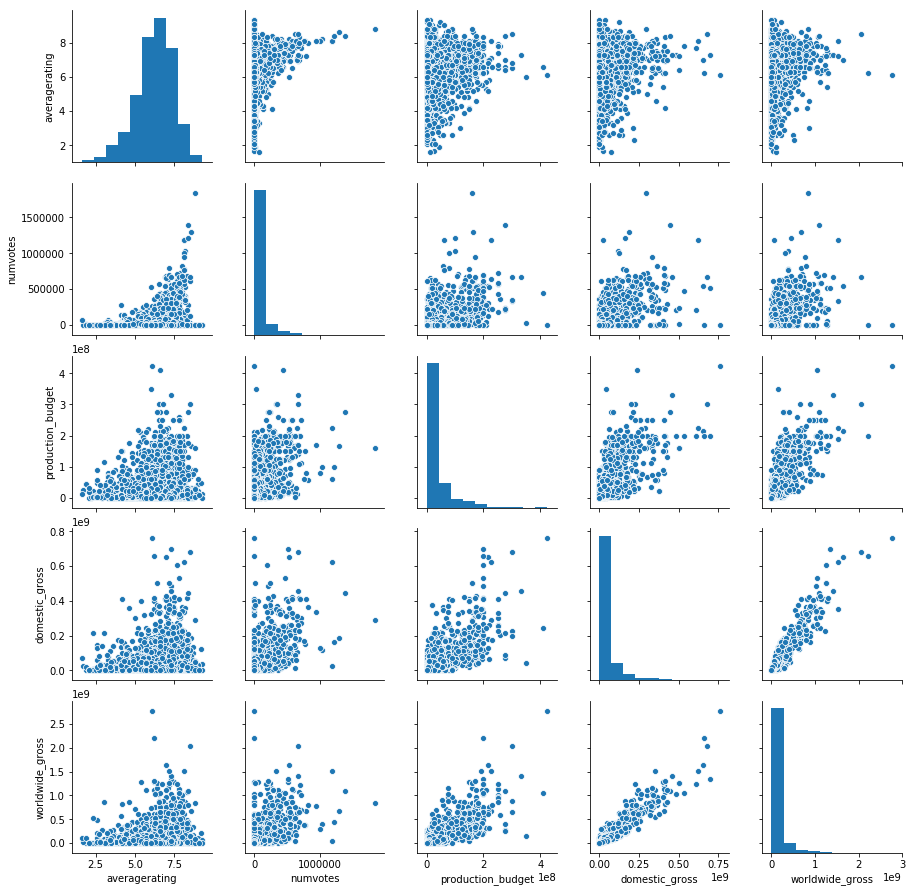

In [31]:
 # Basic correlogram
sns.pairplot(df1)
plt.show()

In [32]:
# key info: 
# 1. buget significantly correlated with domestic gross and worldwide gross
# 2. domestic gross significantly correlated with worldwide gross

In [33]:
# df1-2. budget to domestic gross and budget to worldwide gross

In [34]:
df1.head()

,genres,averagerating,numvotes,title,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month_year
0,"Action,Animation,Comedy",1.9,8248,Foodfight!,2012-12-31,45000000.0,0.0,73706.0,2012,2012-12
2,"Comedy,Mystery",6.1,14828,The Overnight,2015-06-19,200000.0,1109808.0,1165996.0,2015,2015-06
3,"Adventure,Drama,Romance",6.1,37886,On the Road,2013-03-22,25000000.0,720828.0,9313302.0,2013,2013-03
4,Drama,6.0,6,On the Road,2013-03-22,25000000.0,720828.0,9313302.0,2013,2013-03
5,Drama,5.7,127,On the Road,2013-03-22,25000000.0,720828.0,9313302.0,2013,2013-03


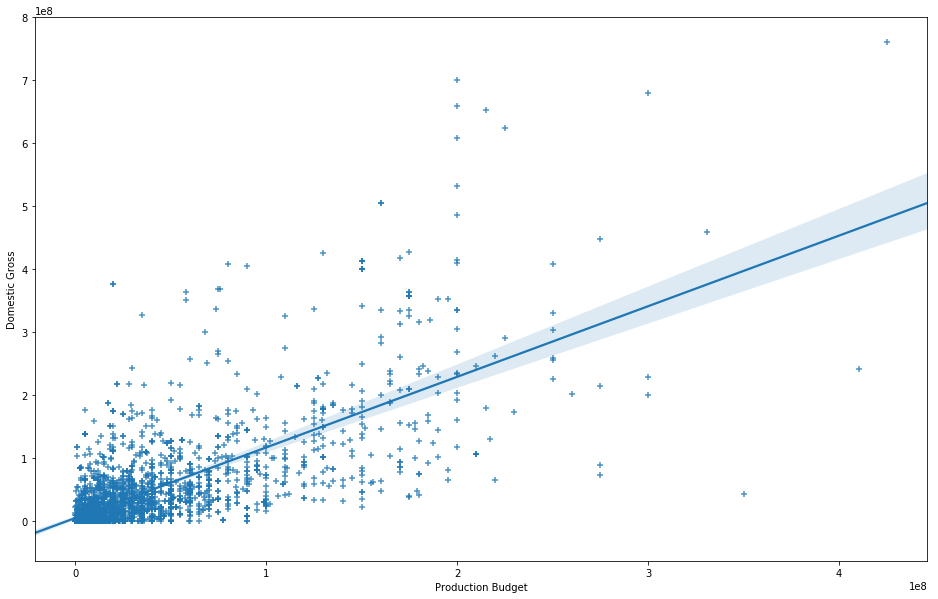

<Figure size 432x288 with 0 Axes>

In [35]:
fig1 = plt.figure(figsize=(16, 10))
plt.plot()

sns.regplot(x=df1["production_budget"], y=df1["domestic_gross"], marker = "+")

plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')
plt.show()

fig1.savefig("budget to domestic gross.png")
plt.clf()

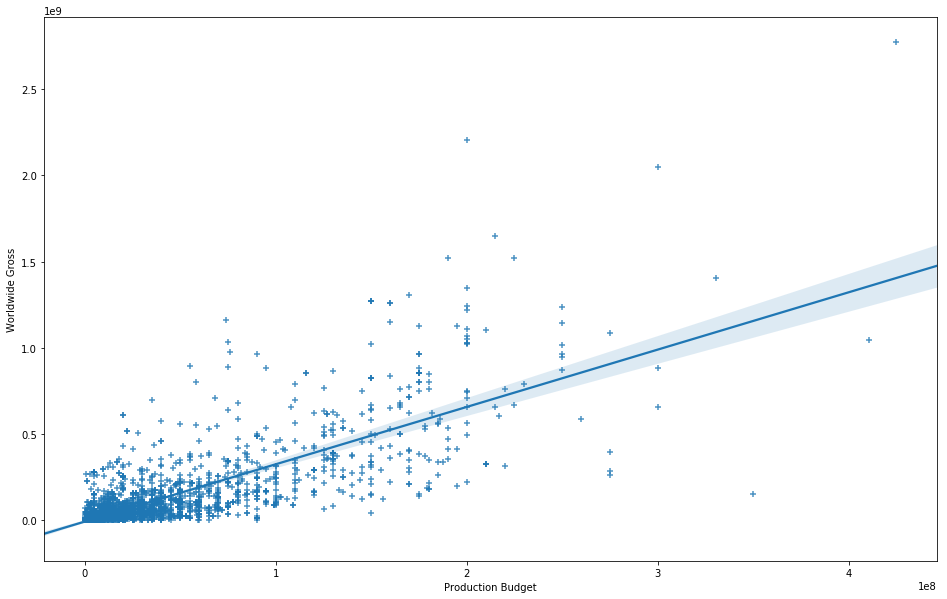

<Figure size 432x288 with 0 Axes>

In [36]:
fig2 = plt.figure(figsize=(16, 10))
plt.plot()

sns.regplot(x=df1["production_budget"], y=df1["worldwide_gross"], marker = "+")

plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.show()

fig2.savefig("budget to worldwide gross.png")
plt.clf()

In [37]:
# df1-3. Basic analysis

In [38]:
# sort by domestic gross
top_domestic_gross = df1.sort_values(by=['domestic_gross'], ascending = False)

In [39]:
top_domestic_gross.head(10)

,genres,averagerating,numvotes,title,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month_year
1279,Horror,6.1,43,Avatar,2009-12-18,425000000.0,760507625.0,2.776345e+09,2009,2009-12
1349,"Action,Adventure,Sci-Fi",7.3,516148,Black Panther,2018-02-16,200000000.0,700059566.0,1.348258e+09,2018,2018-02
2538,"Action,Adventure,Sci-Fi",8.5,670926,Avengers: Infinity War,2018-04-27,300000000.0,678815482.0,2.048134e+09,2018,2018-04
2057,Adventure,6.2,20,Titanic,1997-12-19,200000000.0,659363944.0,2.208208e+09,1997,1997-12
8,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,2015-06-12,215000000.0,652270625.0,1.648855e+09,2015,2015-06
115,"Action,Adventure,Sci-Fi",8.1,1183655,The Avengers,2012-05-04,225000000.0,623279547.0,1.517936e+09,2012,2012-05
2422,"Action,Adventure,Animation",7.7,203510,Incredibles 2,2018-06-15,200000000.0,608581744.0,1.242521e+09,2018,2018-06
2461,"Action,Adventure,Sci-Fi",7.8,478592,Rogue One: A Star Wars Story,2016-12-16,200000000.0,532177324.0,1.049103e+09,2016,2016-12
1922,"Drama,Fantasy,Romance",6.4,18100,Beauty and the Beast,2017-03-17,160000000.0,504014165.0,1.259200e+09,2017,2017-03
1924,"Family,Fantasy,Musical",7.2,238325,Beauty and the Beast,2017-03-17,160000000.0,504014165.0,1.259200e+09,2017,2017-03


In [40]:
# sort by worldwide gross
top_worldwide_gross = df1.sort_values(by=['worldwide_gross'], ascending = False)
top_worldwide_gross.head(10)

,genres,averagerating,numvotes,title,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month_year
1279,Horror,6.1,43,Avatar,2009-12-18,425000000.0,760507625.0,2.776345e+09,2009,2009-12
2057,Adventure,6.2,20,Titanic,1997-12-19,200000000.0,659363944.0,2.208208e+09,1997,1997-12
2538,"Action,Adventure,Sci-Fi",8.5,670926,Avengers: Infinity War,2018-04-27,300000000.0,678815482.0,2.048134e+09,2018,2018-04
8,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,2015-06-12,215000000.0,652270625.0,1.648855e+09,2015,2015-06
2190,"Action,Crime,Thriller",7.2,335074,Furious 7,2015-04-03,190000000.0,353007020.0,1.518723e+09,2015,2015-04
115,"Action,Adventure,Sci-Fi",8.1,1183655,The Avengers,2012-05-04,225000000.0,623279547.0,1.517936e+09,2012,2012-05
1999,"Action,Adventure,Sci-Fi",7.3,665594,Avengers: Age of Ultron,2015-05-01,330600000.0,459005868.0,1.403014e+09,2015,2015-05
1349,"Action,Adventure,Sci-Fi",7.3,516148,Black Panther,2018-02-16,200000000.0,700059566.0,1.348258e+09,2018,2018-02
2661,"Action,Adventure,Sci-Fi",6.2,219125,Jurassic World: Fallen Kingdom,2018-06-22,170000000.0,417719760.0,1.305773e+09,2018,2018-06
496,"Adventure,Animation,Comedy",7.5,516998,Frozen,2013-11-22,150000000.0,400738009.0,1.272470e+09,2013,2013-11


In [50]:
# sort by both domestic and worldwide gross
top_domestic_worldwide_gross = df1.sort_values(by=['domestic_gross', 'worldwide_gross'], ascending=False)
top_domestic_worldwide_gross.head(100)

,genres,averagerating,numvotes,title,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month_year
1279,Horror,6.1,43,Avatar,2009-12-18,425000000.0,760507625.0,2.776345e+09,2009,2009-12
1349,"Action,Adventure,Sci-Fi",7.3,516148,Black Panther,2018-02-16,200000000.0,700059566.0,1.348258e+09,2018,2018-02
2538,"Action,Adventure,Sci-Fi",8.5,670926,Avengers: Infinity War,2018-04-27,300000000.0,678815482.0,2.048134e+09,2018,2018-04
2057,Adventure,6.2,20,Titanic,1997-12-19,200000000.0,659363944.0,2.208208e+09,1997,1997-12
8,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,2015-06-12,215000000.0,652270625.0,1.648855e+09,2015,2015-06
115,"Action,Adventure,Sci-Fi",8.1,1183655,The Avengers,2012-05-04,225000000.0,623279547.0,1.517936e+09,2012,2012-05
2422,"Action,Adventure,Animation",7.7,203510,Incredibles 2,2018-06-15,200000000.0,608581744.0,1.242521e+09,2018,2018-06
2461,"Action,Adventure,Sci-Fi",7.8,478592,Rogue One: A Star Wars Story,2016-12-16,200000000.0,532177324.0,1.049103e+09,2016,2016-12
1922,"Drama,Fantasy,Romance",6.4,18100,Beauty and the Beast,2017-03-17,160000000.0,504014165.0,1.259200e+09,2017,2017-03
1924,"Family,Fantasy,Musical",7.2,238325,Beauty and the Beast,2017-03-17,160000000.0,504014165.0,1.259200e+09,2017,2017-03


In [45]:
top_domestic_worldwide_gross.genres.value_counts()

Drama                              319
Documentary                        126
Comedy                             108
Comedy,Drama                        93
Drama,Romance                       77
Comedy,Drama,Romance                75
Adventure,Animation,Comedy          73
Horror                              63
Comedy,Romance                      59
Action,Adventure,Sci-Fi             58
Drama,Thriller                      57
Action,Crime,Drama                  56
Horror,Thriller                     50
Horror,Mystery,Thriller             45
Thriller                            43
Action,Adventure,Fantasy            40
Crime,Drama,Thriller                37
Action,Adventure,Drama              34
Action,Comedy,Crime                 34
Crime,Drama                         32
Action,Crime,Thriller               30
Action,Adventure,Comedy             30
Biography,Drama,History             27
Action,Thriller                     27
Action,Drama,Thriller               25
Drama,Mystery,Thriller   

In [47]:
top_domestic_worldwide_gross.genres.head(10)

1279                        Horror
1349       Action,Adventure,Sci-Fi
2538       Action,Adventure,Sci-Fi
2057                     Adventure
8          Action,Adventure,Sci-Fi
115        Action,Adventure,Sci-Fi
2422    Action,Adventure,Animation
2461       Action,Adventure,Sci-Fi
1922         Drama,Fantasy,Romance
1924        Family,Fantasy,Musical
Name: genres, dtype: object

In [48]:
movie_names = df1.title

In [49]:
movie_names

0                                              Foodfight!
2                                           The Overnight
3                                             On the Road
4                                             On the Road
5                                             On the Road
6                         The Secret Life of Walter Mitty
7                             A Walk Among the Tombstones
8                                          Jurassic World
9                                           The Rum Diary
10                                      The Three Stooges
11                                       Anderson's Cross
12                                                Tangled
13                                            John Carter
14                                         Action Jackson
15                                    Dinner for Schmucks
16                                             The A-Team
17                                         The Possession
18            

In [ ]:
# df1-4 Groupby

In [43]:
df1.genres.value_counts()

Drama                              319
Documentary                        126
Comedy                             108
Comedy,Drama                        93
Drama,Romance                       77
Comedy,Drama,Romance                75
Adventure,Animation,Comedy          73
Horror                              63
Comedy,Romance                      59
Action,Adventure,Sci-Fi             58
Drama,Thriller                      57
Action,Crime,Drama                  56
Horror,Thriller                     50
Horror,Mystery,Thriller             45
Thriller                            43
Action,Adventure,Fantasy            40
Crime,Drama,Thriller                37
Action,Comedy,Crime                 34
Action,Adventure,Drama              34
Crime,Drama                         32
Action,Crime,Thriller               30
Action,Adventure,Comedy             30
Biography,Drama,History             27
Action,Thriller                     27
Drama,Mystery,Thriller              25
Action,Drama,Thriller    

In [42]:
# df2

In [ ]:
df2 = df[~df['runtime_minutes'].isna()]

In [ ]:
df2.info()

In [ ]:
df2 = df2[~df2['genres'].isna()]

In [ ]:
df2.info()

In [ ]:
df2.runtime_minutes.max()

In [ ]:
df2.runtime_minutes.describe()

In [ ]:
### df['amount_by_source'] = df.groupby(['source'])['amount'].transform('sum')